In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import itertools
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from mlxtend.frequent_patterns import association_rules, apriori


display(HTML("<style>.container { width : 98% !important; }</style>"))

pd.set_option('display.max_columns',500)

In [2]:
# folder ('./Downloads/instacart-market-basket-analysis')
# url = 'https://www.kaggle.com/competitions/instacart-market-basket-analysis/data'
##### Unused instacart data
# full_data = pd.read_csv('./Downloads/instacart-market-basket-analysis/order_products__train.csv')
# full_data

In [3]:
# data1 = pd.read_csv('./Downloads/archive (19)/groceries.csv')

data2 = pd.read_csv('./Downloads/archive (19)/groceries - groceries.csv')
cols1 = data2.columns
cols2 = []
for x in cols1:
    cols2.append(x.lower().replace(" ",'_'))
data2.columns = cols2
data2.columns

Index(['item(s)', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6',
       'item_7', 'item_8', 'item_9', 'item_10', 'item_11', 'item_12',
       'item_13', 'item_14', 'item_15', 'item_16', 'item_17', 'item_18',
       'item_19', 'item_20', 'item_21', 'item_22', 'item_23', 'item_24',
       'item_25', 'item_26', 'item_27', 'item_28', 'item_29', 'item_30',
       'item_31', 'item_32'],
      dtype='object')

In [4]:
data3 = data2[['item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6','item_7', 'item_8', 'item_9', 'item_10', 'item_11', 'item_12',
'item_13', 'item_14', 'item_15', 'item_16', 'item_17', 'item_18','item_19', 'item_20', 'item_21', 'item_22', 'item_23', 'item_24',
'item_25', 'item_26', 'item_27', 'item_28', 'item_29', 'item_30','item_31', 'item_32']].copy()

data3
transactions = pd.get_dummies(data3, prefix="itm_desc")
transactions = transactions.groupby(level=0, axis=1).sum()
transactions = transactions>0

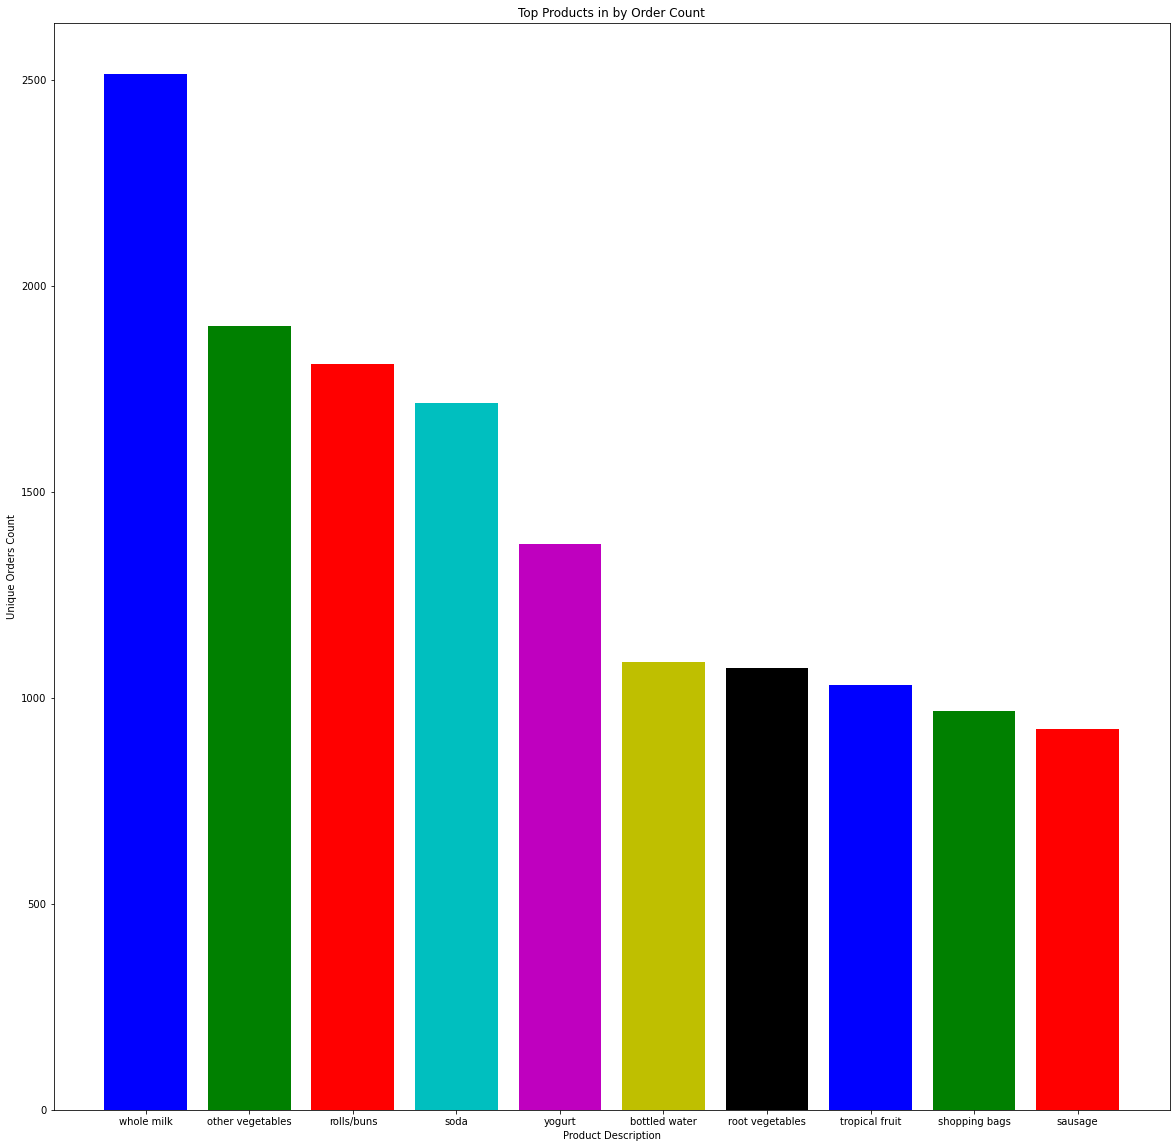

In [5]:
xaction_ct = pd.DataFrame(transactions.sum(axis=0).sort_values(ascending=False)).reset_index()
xaction_ct.columns = ['prod_desc','xaction_ct']
xaction_ct = xaction_ct.iloc[0:10,:].copy()
descs = []
for x in xaction_ct['prod_desc']:
    descs.append(x[9::])

plt.figure(figsize=(20,20))
plt.xlabel('Product Description')
plt.ylabel('Unique Orders Count')
plt.title('Top Products in by Order Count')
plt.bar(height=xaction_ct['xaction_ct'],x=descs,color=['b','g','r','c','m','y','k'])
plt.show()

In [6]:
often_bought_together = apriori(transactions, min_support=0.01, use_colnames=True)
often_bought_together

,support,itemsets
0,0.033452,(itm_desc_UHT-milk)
1,0.017692,(itm_desc_baking powder)
2,0.052466,(itm_desc_beef)
3,0.033249,(itm_desc_berries)
4,0.026029,(itm_desc_beverages)
...,...,...
328,0.011998,"(itm_desc_tropical fruit, itm_desc_root vegeta..."
329,0.014540,"(itm_desc_root vegetables, itm_desc_yogurt, it..."
330,0.010473,"(itm_desc_yogurt, itm_desc_soda, itm_desc_whol..."
331,0.015150,"(itm_desc_tropical fruit, itm_desc_yogurt, itm..."


In [7]:
assoc_rules = association_rules(often_bought_together, metric="lift", min_threshold=1)
assoc_rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
440,(itm_desc_curd),"(itm_desc_yogurt, itm_desc_whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
437,"(itm_desc_yogurt, itm_desc_whole milk)",(itm_desc_curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
423,(itm_desc_root vegetables),"(itm_desc_citrus fruit, itm_desc_other vegetab...",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
418,"(itm_desc_citrus fruit, itm_desc_other vegetab...",(itm_desc_root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
539,"(itm_desc_other vegetables, itm_desc_yogurt)",(itm_desc_whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
...,...,...,...,...,...,...,...,...,...
318,(itm_desc_pip fruit),(itm_desc_soda),0.075648,0.174377,0.013320,0.176075,1.009738,0.000128,1.002061
40,(itm_desc_shopping bags),(itm_desc_bottled water),0.098526,0.110524,0.010981,0.111455,1.008428,0.000092,1.001048
41,(itm_desc_bottled water),(itm_desc_shopping bags),0.110524,0.098526,0.010981,0.099356,1.008428,0.000092,1.000922
313,(itm_desc_pip fruit),(itm_desc_rolls/buns),0.075648,0.183935,0.013930,0.184140,1.001114,0.000015,1.000251
